# Setup Paths

In [1]:
#path to the data
pathCOMPASOutput =   '/Volumes/Virgo/DATA/BHNS/Fiducial/'



# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py  as h5
import gc
#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#custom imports
import coencodeVarious as CV
import ClassCOMPAS     as CC
import ClassFormationChannels as FC

from PostProcessingScripts import * 

# General idea

Previous versions of the data reduction for this paper show more precise data reduction steps.
Since we are only interested in DCOs there are only few settings that I have preset in 
the ClassCOMPASData.

This notebook is focussed on plotting some of the distributions of our populations of DCOs
that are of interest for the cosmic integration.
Because of the MSSFR, we want to look at different metallicities and delay times.
Because we care about detecting the events we want mass and mass ratio distributions
Because we want rates we want yield of DCO per solar mass of star formation.



In [3]:
#For consistency between al the plots I predefine the colours and labels here

#Colours and DCO types
Types      = ['BBH', 'BHNS', 'BNS']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

#Metallicities of interest and transparency colour
solar = 0.0142
indZ  = np.array([14,17,22,25]) #looked up earlier
#roughly a tenth - fifth - half - and solar metallicities
alphas     = [1. ,0.65, 0.4, 0.25]

# Yield per Z and formation channels

Already from the notebook 1_formationChannels we know how to get the formation
channels of a given DCO population. Here we quickly redo the calculation so we have the seeds.
But we use the already grouped indices of the sorted Ranks. These groups are for formation channels
that are similar except for type of Donor/accretor at the moment of RLOF. Although this will matter
for future research (is CHeB MT stable?), for now it is outside the scope. 

In [4]:


#Set up and do formation channels, so I can get the seeds
fc = FC.FormationChannels(path = pathCOMPASOutput)
fc.formationChannelsSeeds(types='BHNS', withinHubbleTime=True, optimistic=False)
#Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
Data.setCOMPASData()
SeedsHubble    = Data.seeds[Data.Hubble==True]

(13774.99059456664, 'sum sorted counts')
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


In [ ]:
# dictRank = {'no Interaction':[0],    'non CEE Channel':[1,6,7],\
#             'Classic Channel':[2,5], 'single stable MT':[3,4,10],\
#             'double Core CEE':[8],   'no CEE':[9],\
#             'fortunate Kick 1MT':[11]}
# dictRank = {'non CEE Channel':[0], 'Classic Channel':[1,2],'double Core CEE':[3]}


# # total simulation all Metallicities (have to double check when adding other metallicities)
# dictChannelsBHNS = {'classic CaseB':[2,3,4,5,6,21,23,27,29,33], 'classic caseA':[1,7,8,12,24,28,35,47,49], \
#                 'double core CE':[9,10,14,31,34,44], 'unstable caseC':[13,18,26,30,36,40,41,45,46,48], \
#                  'no CEE':[15,17,42],'caseA rejuvenation':[16,19],\
#                     'classic caseC':[11,20,22,25,32,37,38,39,43]}



# dictChannelsNSorBHfirst= {'BH-NS':[2,3,6,10,11,13,14,15,17,18,20,21,22,23,25,26,27], 'NS-BH':[1,4,5,7,8,9,12,16,19,24]}





In [ ]:
# dictChannelsBHNSList = ['stable A', \
#                      'stable B', 'stable C', 'stable B no CEE', \
#                     'case B immediate CE',\
#                     r'case C immediate CE', \
#                  r'double-core CE', 'other']

In [ ]:
# #Only want the three most important channels,
# #create empty lists to fill with seeds
# ChannelSeeds   = [[], [], [], [],[],[],[],[]]
# # ChannelLabels  = ['classic CaseB', 'classic caseA', \
# #                 'double core CE', 'unstable caseC', 'no CEE', \
# #                'caseA rejuvenation', 'classic caseC']
# for nrL, label in enumerate(dictRankBHNSList):
#     for index in dictRankBHNS[label]:
#         #give me the seeds of channel and mask only the ones merging within hubble
#         seedsInterest = fc.sortedSeeds[index]
#         seedsInterest = seedsInterest[np.in1d(seedsInterest,SeedsHubble)]
#         ChannelSeeds[nrL].extend(seedsInterest)
# #Rename and define colours for plotting
# ChannelLabels  = ['Channel I', 'Channel II', 'Channel III']
# ChannelColours = ['lightgray', 'darkgray', 'gray']

# #Got my seeds labels etc so clear up and free memory
# del fc
# del Data
# del SeedsHubble
# del seedsInterest
# gc.collect()

In [ ]:


# dictRankBHNSList = ['classic CaseB', 'classic caseA', \
#                 'double core CE', 'unstable caseC', 'no CEE', \
#                'caseA rejuvenation', 'classic caseC']

# for nrC, Channel in enumerate(dictRankBHNSList):
#     print nrC, Channel
    

# N per Z Channels

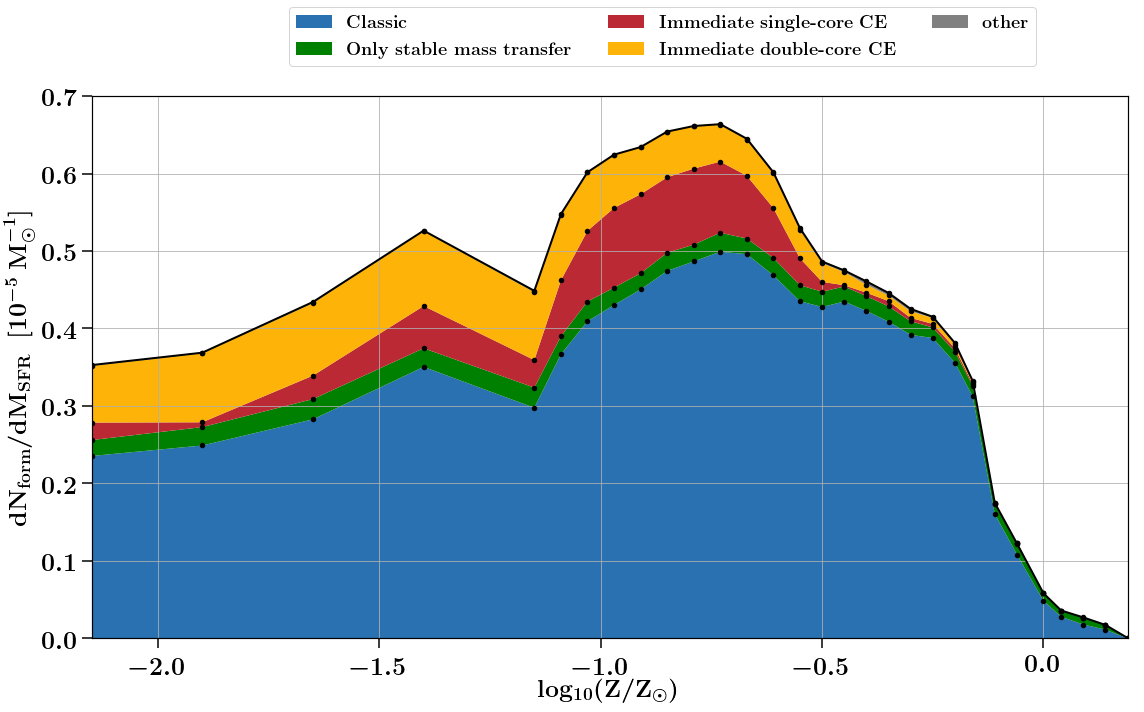

In [6]:




def plotChannels(axes, fc, Data, dictRank, withinHubble=True):
    cm       = plt.get_cmap('inferno')
    nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(Data.metallicityGrid))
    log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
    for nrC, Channel in enumerate(dictChannelsBHNSList):
        #Get the seeds that relate to sorted indices
        seedsInterest = []
        for index in dictRank[Channel]:
            seedsInterest.extend(fc.sortedSeeds[index-1])
        #Get metallicity systems this works because seeds in both
        #files are in the same order
        mask = np.in1d(Data.seeds, np.array(seedsInterest))
        if withinHubble == True:
            mask = mask & (Data.Hubble == True)
        metallicities = Data.metallicitySystems[mask]
        weights = Data.weight[mask] # //floor weights
        #Now I have the metallicities of all systems in channel
        #Bin them over metallicities and plot fill between
        upperY = np.zeros(len(Data.metallicityGrid))
        

        
        for nrZ, Z in enumerate(Data.metallicityGrid):
            maskZ = metallicities == Z
            upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
        upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
        axes.fill_between(log10ZZsun, lowerY*1e5, upperY*1e5, \
                         facecolor=colorlist[nrC],\
                          label=dictChannelsBHNSListBolt[nrC], alpha=1)
        lowerY = upperY
        
        
        axes.scatter(log10ZZsun, upperY*1e5, \
                         c='k',\
                         s=20, alpha=1, zorder=1000)
        
    axes.plot(log10ZZsun, upperY*1e5, \
                     c='k',\
                     lw=2, alpha=1, zorder=500)        
        
        
        
    nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
    nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
    axes.legend(loc=5, prop={'size':18}, ncol=3,\
         bbox_to_anchor=(.92, 1.11))
    
# lgd = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.92, 1.2),  markerscale=3., scatterpoints=1) # loc = 'upper center')
#     #axes.set_yscale('log')
    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0)

fig, axes = plt.subplots(1,1,figsize=(16,10))
plotChannels(axes, fc, Data, dictChannelsBHNS , True)
# plotChannels(axes[1], fc, Data, dictRankBHNS, True)

plt.tight_layout()
plt.grid(True)
plt.savefig('./channelBHNS_pessimistic_BBH_.png')
plt.show()
plt.close()

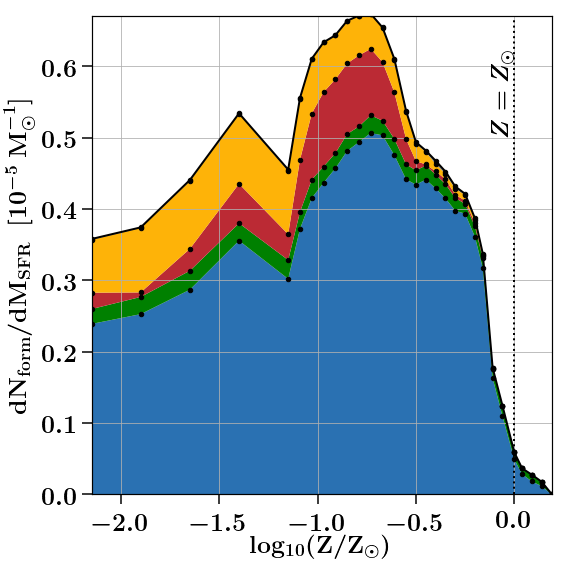

In [122]:
def plotChannels(axes, fc, Data, dictRank, withinHubble=True):
    cm       = plt.get_cmap('inferno')
    nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(Data.metallicityGrid))
    log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
    for nrC, Channel in enumerate(dictChannelsBHNSList):
        #Get the seeds that relate to sorted indices
        seedsInterest = []
        for index in dictRank[Channel]:
            seedsInterest.extend(fc.sortedSeeds[index-1])
        #Get metallicity systems this works because seeds in both
        #files are in the same order
        mask = np.in1d(Data.seeds, np.array(seedsInterest))
        if withinHubble == True:
            mask = mask & (Data.Hubble == True)
        metallicities = Data.metallicitySystems[mask]
        weights = Data.weight[mask] # //floor weights
        #Now I have the metallicities of all systems in channel
        #Bin them over metallicities and plot fill between
        upperY = np.zeros(len(Data.metallicityGrid))
        

        
        for nrZ, Z in enumerate(Data.metallicityGrid):
            maskZ = metallicities == Z
            upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
        upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
        axes.fill_between(log10ZZsun, lowerY*1e5, upperY*1e5, \
                         facecolor=colorlist[nrC],\
                          label=dictChannelsBHNSListBolt[nrC], alpha=1)
        lowerY = upperY
        
        
        axes.scatter(log10ZZsun, upperY*1e5, \
                         c='k',\
                         s=20, alpha=1, zorder=1000)
        
    axes.plot(log10ZZsun, upperY*1e5, \
                     c='k',\
                     lw=2, alpha=1, zorder=500)
    
    axes.plot([0,0], [0,0.7], \
                     c='k',\
                     lw=2, alpha=1, linestyle=':', zorder=500)          
        
        
    nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
    nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
#     axes.legend(loc=5, prop={'size':18}, ncol=3,\
#          bbox_to_anchor=(.92, 1.11))
    axes.text(-0.11, 0.6, s=r'$Z=Z_{\odot}$', fontsize=fs, rotation=90)
    
# lgd = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.92, 1.2),  markerscale=3., scatterpoints=1) # loc = 'upper center')
#     #axes.set_yscale('log')
    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0, top=0.67)

fig, axes = plt.subplots(1,1,figsize=(8,8))
plotChannels(axes, fc, Data, dictChannelsBHNS , True)
# plotChannels(axes[1], fc, Data, dictRankBHNS, True)

plt.tight_layout()
plt.grid(True)
plt.savefig('./channelBHNS_pessimistic_small_4channels_BBH_.png')
plt.show()
plt.close()

# PLOT ALL DCO subchannel rates 

## 01 Fiducial

In [7]:
#path to the data
pathCOMPASOutput =   '/Volumes/Virgo/DATA/BHNS/Fiducial/'



#But I want only within Hubble time 
Data_01_BHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_01_BHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
Data_01_BHNS.setCOMPASData()


#################

#But I want only within Hubble time 
Data_01_BNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_01_BNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
Data_01_BNS.setCOMPASData()



###################

#But I want only within Hubble time 
Data_01_BBH            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_01_BBH.setCOMPASDCOmask(types='BBH',  withinHubbleTime=True, optimistic=False)
Data_01_BBH.setCOMPASData()





weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


## 02 alpha = 0.1

In [8]:
#path to the data
pathCOMPASOutput =   '/Volumes/Virgo/DATA/BHNS/alpha0_1/'
#Set up and do formation channels, so I can get the seeds
# fc_02_BHNS = FC.FormationChannels(path = pathCOMPASOutput)
# fc_02_BHNS.formationChannelsSeeds(types='BHNS', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_02_BHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_02_BHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
Data_02_BHNS.setCOMPASData()


###################
#Set up and do formation channels, so I can get the seeds
# fc_02_BNS = FC.FormationChannels(path = pathCOMPASOutput)
# fc_02_BNS.formationChannelsSeeds(types='BNS', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_02_BNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_02_BNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
Data_02_BNS.setCOMPASData()



###################
#Set up and do formation channels, so I can get the seeds
# fc_02_BBH = FC.FormationChannels(path = pathCOMPASOutput)
# fc_02_BBH.formationChannelsSeeds(types='BBH', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_02_BBH            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_02_BBH.setCOMPASDCOmask(types='BBH',  withinHubbleTime=True, optimistic=False)
Data_02_BBH.setCOMPASData()






weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


## 03 alpha = 10 

In [9]:
#path to the data
pathCOMPASOutput =   '/Volumes/Virgo/DATA/BHNS/alpha_10/'
#Set up and do formation channels, so I can get the seeds
# fc_03_BHNS = FC.FormationChannels(path = pathCOMPASOutput)
# fc_03_BHNS.formationChannelsSeeds(types='BHNS', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_03_BHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_03_BHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=False)
Data_03_BHNS.setCOMPASData()


###################
#Set up and do formation channels, so I can get the seeds
# fc_03_BNS = FC.FormationChannels(path = pathCOMPASOutput)
# fc_03_BNS.formationChannelsSeeds(types='BNS', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_03_BNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_03_BNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
Data_03_BNS.setCOMPASData()



###################
#Set up and do formation channels, so I can get the seeds
# fc_03_BBH = FC.FormationChannels(path = pathCOMPASOutput)
# fc_03_BBH.formationChannelsSeeds(types='BBH', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_03_BBH            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_03_BBH.setCOMPASDCOmask(types='BBH',  withinHubbleTime=True, optimistic=False)
Data_03_BBH.setCOMPASData()







weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


## 04 Optimistic 

In [10]:
#path to the data
pathCOMPASOutput =   '/Volumes/Virgo/DATA/BHNS/Fiducial/'
#Set up and do formation channels, so I can get the seeds
# fc_04_BHNS = FC.FormationChannels(path = pathCOMPASOutput)
# fc_04_BHNS.formationChannelsSeeds(types='BHNS', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_04_BHNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_04_BHNS.setCOMPASDCOmask(types='BHNS',  withinHubbleTime=True, optimistic=True)
Data_04_BHNS.setCOMPASData()


###################
#Set up and do formation channels, so I can get the seeds
# fc_04_BNS = FC.FormationChannels(path = pathCOMPASOutput)
# fc_04_BNS.formationChannelsSeeds(types='BNS', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_04_BNS            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_04_BNS.setCOMPASDCOmask(types='BNS',  withinHubbleTime=True, optimistic=False)
Data_04_BNS.setCOMPASData()



###################
#Set up and do formation channels, so I can get the seeds
# fc_04_BBH = FC.FormationChannels(path = pathCOMPASOutput)
# fc_04_BBH.formationChannelsSeeds(types='BBH', withinHubbleTime=True, optimistic=False)
# #Based on previous notes I already now the ranks and channels


#But I want only within Hubble time 
Data_04_BBH            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data_04_BBH.setCOMPASDCOmask(types='BBH',  withinHubbleTime=True, optimistic=False)
Data_04_BBH.setCOMPASData()








weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()
weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


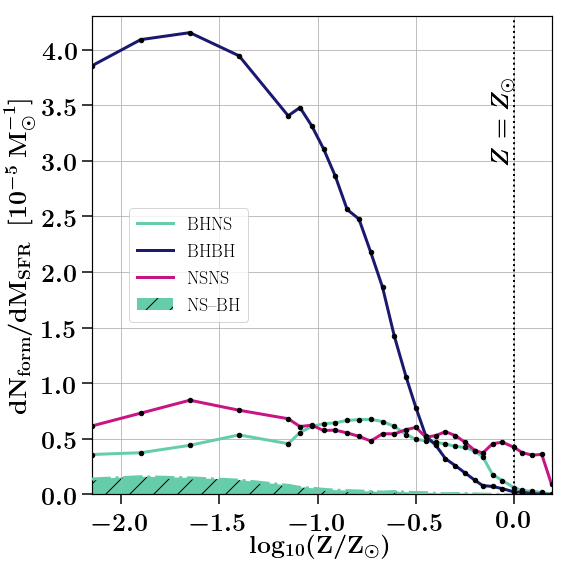

In [114]:
def plotChannels_Fiducial(axes, listDatas, modelnames, withinHubble=True):
    cm       = plt.get_cmap('inferno')
#     nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(listDatas[0][0].metallicityGrid))
    log10ZZsun = np.round(np.log10(listDatas[0][0].metallicityGrid/solar),2)
    Types      = ['BHNS', 'BHBH', 'NSNS']
    Colours    = ['mediumaquamarine','midnightblue','mediumvioletred' ]      
    
    for ind_m, modelname in enumerate(modelnames):
    
        DATA_model = listDatas[ind_m]

  

        for ind_t, type in enumerate(Types):

            Data = DATA_model[ind_t]
#             if withinHubble == True:
#                 mask = mask & (Data.Hubble == True)
        #         metallicities = Data.metallicitySystems[mask]
            metallicities = Data.metallicitySystems #[mask]
            weights = Data.weight # //floor weights
        #         #Now I have the metallicities of all systems in channel
        #         #Bin them over metallicities and plot fill between
            upperY = np.zeros(len(Data.metallicityGrid))
            upperYNSfirst = np.zeros(len(Data.metallicityGrid))


            for nrZ, Z in enumerate(Data.metallicityGrid):
                maskZ = metallicities == Z
                upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
            upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY

            
#             if ind_t==0:
            labelname=Types[ind_t]

            axes.plot(log10ZZsun, upperY*1e5, color=Colours[ind_t], \
                      lw=3, alpha=1, zorder=1000, linestyle=linestyles[ind_m], label=labelname)
            
            axes.scatter(log10ZZsun, upperY*1e5, \
                             c='k',\
                             s=20, alpha=1, zorder=10000)            

            if type=='BHNS':
                # figure out mask for BHMNS where NS forms first :-) 

                seedsInterest = []
                for index in dictChannelsNSorBHfirst['NS-BH']:
                    seedsInterest.extend(fc.sortedSeeds[index-1])
                #Get metallicity systems this works because seeds in both
                #files are in the same order
                maskNSBH = np.in1d(Data.seeds, np.array(seedsInterest))
                if withinHubble == True:
                    maskNSBH = maskNSBH & (Data.Hubble == True)
#                 metallicities = Data.metallicitySystems[maskNSBH]
#                 weights = weights[maskNSBH] # //floor weights
                #Now I have the metallicities of all systems in channel
                #Bin them over metallicities and plot fill between
#                 upperY = np.zeros(len(Data.metallicityGrid))
                        
                
                
#                 maskNSfirst = (Data.mass1  <= 2.5) # m1 is a NS: I should also check which SN goes first
                for nrZ, Z in enumerate(Data.metallicityGrid):
                    maskZ = (metallicities == Z) & (maskNSBH==1)
                    upperYNSfirst[nrZ] = np.sum(weights[maskZ]) # //floor weights            
                upperYNSfirst = np.divide(upperYNSfirst, Data.totalMassEvolvedPerZ) + lowerY

                axes.fill_between(log10ZZsun, lowerY*1e5, upperYNSfirst*1e5, \
                                 facecolor=Colours[ind_t],\
                                  label='NS--BH', alpha=1, hatch='/')
                
                axes.plot(log10ZZsun, upperYNSfirst*1e5, color=Colours[ind_t], \
                          lw=3, alpha=1, zorder=1000, linestyle='-.')
            

    #     axes.plot(log10ZZsun, upperY*1e5, \
#                      c='k',\
#                      lw=2, alpha=1, zorder=500)        
        
    axes.text(-0.11, 3.6, s=r'$Z=Z_{\odot}$', fontsize=fs, rotation=90)
            
    axes.plot([0,0], [0,4.7], \
                     c='k',\
                     lw=2, alpha=1, linestyle=':', zorder=500) 
    
    nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
    nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
    axes.legend(loc=5, prop={'size':18}, ncol=1,\
         bbox_to_anchor=(.36, 0.48))
    
# lgd = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.92, 1.2),  markerscale=3., scatterpoints=1) # loc = 'upper center')
#     #axes.set_yscale('log')
    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0.0,top=4.3)
#   LOG 
#     axes.set_ylim(bottom=0.1,top=4.3)
#     axes.set_yscale('log')    
d01 = [Data_01_BHNS, Data_01_BBH, Data_01_BNS]

    
listDatas = [d01]    
modelnames = ['Fiducial']
linestyles = ['-', '--', '-.', ':']
dictChannelsNSorBHfirst= {'BH-NS':[], 'NS-BH':[6,8,13,21,24,26,27,29, 33,34, 36,42,43,46,47,54,55]}

fig, axes = plt.subplots(1,1,figsize=(8,8))
plotChannels_Fiducial(axes,  listDatas, modelnames , True)


plt.tight_layout()
plt.grid(True)
plt.savefig('./Rate_vs_Z_pessimistic_Fiducial_BBH_.png')
plt.show()
plt.close()

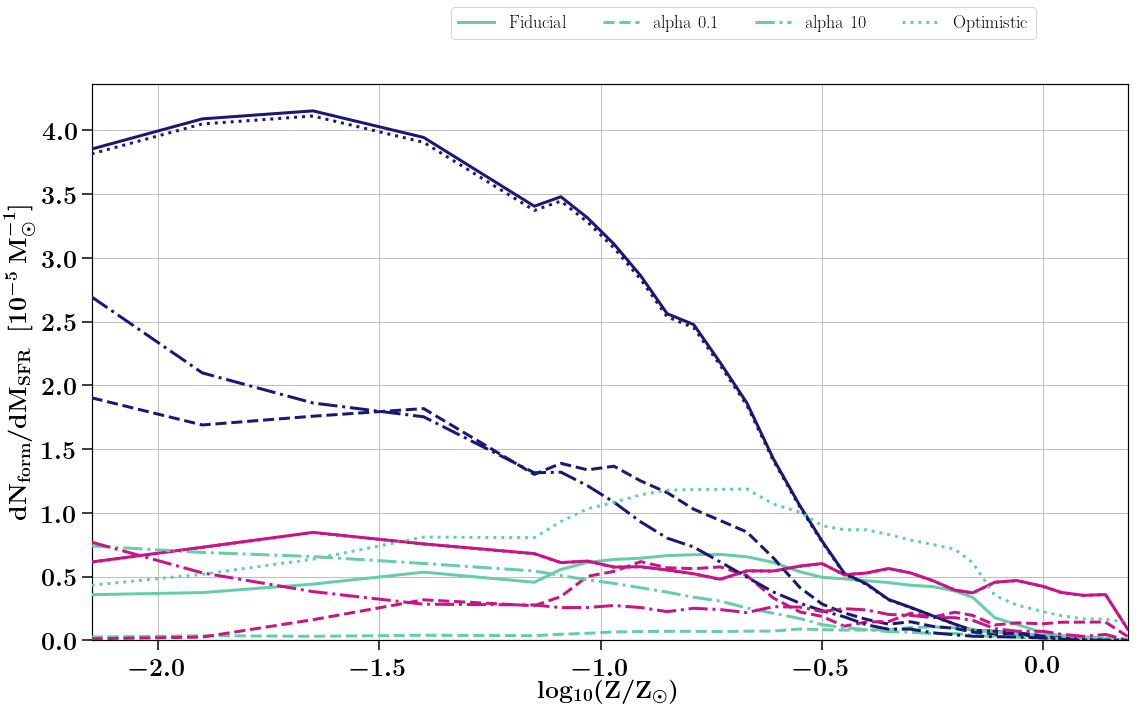

In [11]:




def plotChannels_modelsCombined(axes, listDatas, modelnames, withinHubble=True):
    cm       = plt.get_cmap('inferno')
#     nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(listDatas[0][0].metallicityGrid))
    log10ZZsun = np.round(np.log10(listDatas[0][0].metallicityGrid/solar),2)
    Types      = ['BBH', 'BHNS', 'BNS']
    Colours    = ['mediumaquamarine','midnightblue','mediumvioletred' ]      
    
    for ind_m, modelname in enumerate(modelnames):
    
        DATA_model = listDatas[ind_m]

  

        for ind_t, type in enumerate(Types):

            Data = DATA_model[ind_t]
#             if withinHubble == True:
#                 mask = mask & (Data.Hubble == True)
        #         metallicities = Data.metallicitySystems[mask]
            metallicities = Data.metallicitySystems #[mask]
            weights = Data.weight # //floor weights
        #         #Now I have the metallicities of all systems in channel
        #         #Bin them over metallicities and plot fill between
            upperY = np.zeros(len(Data.metallicityGrid))



            for nrZ, Z in enumerate(Data.metallicityGrid):
                maskZ = metallicities == Z
                upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
            upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
        #     axes.fill_between(log10ZZsun, lowerY*1e5, upperY*1e5, \
        #                      facecolor=colorlist[nrC],\
        #                       label=dictChannelsBHNSListBolt[nrC], alpha=1)
        #     lowerY = upperY

            if ind_t==0:
                labelname=modelnames[ind_m]
            else:
                labelname=None
                
                
                
                
            axes.plot(log10ZZsun, upperY*1e5, color=Colours[ind_t], \
                      lw=3, alpha=1, zorder=1000, linestyle=linestyles[ind_m], label=labelname)

    #     axes.plot(log10ZZsun, upperY*1e5, \
#                      c='k',\
#                      lw=2, alpha=1, zorder=500)        
        
        
        
    nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
    nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
    axes.legend(loc=5, prop={'size':18}, ncol=4,\
         bbox_to_anchor=(.92, 1.11))
    
# lgd = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.92, 1.2),  markerscale=3., scatterpoints=1) # loc = 'upper center')
#     #axes.set_yscale('log')
    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0)

    
d01 = [Data_01_BHNS, Data_01_BBH, Data_01_BNS]
d02 = [Data_02_BHNS, Data_02_BBH, Data_02_BNS]
d03 = [Data_03_BHNS, Data_03_BBH, Data_03_BNS]
d04 = [Data_04_BHNS, Data_04_BBH, Data_04_BNS]
    
listDatas = [d01,d02,d03,d04]    
modelnames = ['Fiducial', 'alpha 0.1', 'alpha  10', 'Optimistic']
linestyles = ['-', '--', '-.', ':']


fig, axes = plt.subplots(1,1,figsize=(16,10))
plotChannels_modelsCombined(axes,  listDatas, modelnames , True)
# plotChannels(axes[1], fc, Data, dictRankBHNS, True)

plt.tight_layout()
plt.grid(True)
plt.savefig('./Rate_vs_Z_pessimistic_combined_BBH_.png')
plt.show()
plt.close()

/Users/floorbroekgaarden/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in divide
/Users/floorbroekgaarden/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


0
1
0
1
0
1
0
1


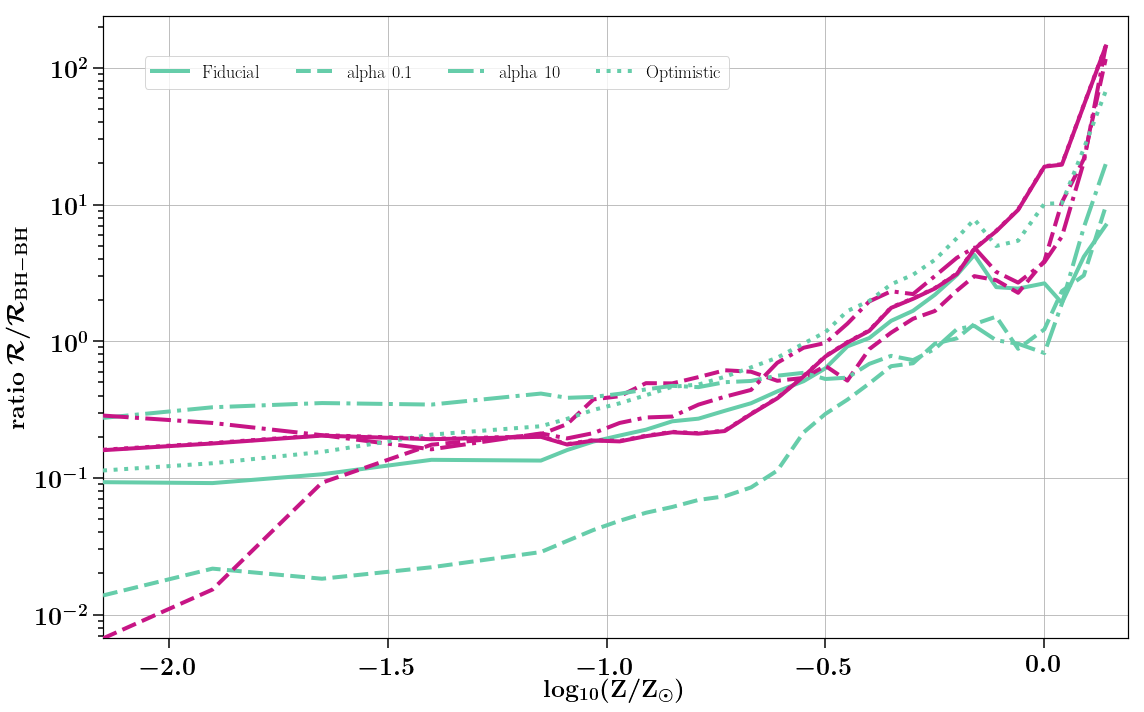

In [12]:




def plotRateRatios_modelsCombined(axes, listDatas, modelnames, withinHubble=True):
    cm       = plt.get_cmap('inferno')
#     nColors  = len(dictRank)+1
    mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
    solar = 0.0142
    #We are going to sum and fill between channels 
    lowerY = np.zeros(len(listDatas[0][0].metallicityGrid))
    log10ZZsun = np.round(np.log10(listDatas[0][0].metallicityGrid/solar),2)
    Types      = ['BHNS','BBH',  'BNS']
    Colours    = ['mediumaquamarine','midnightblue','mediumvioletred' ]      
    
    for ind_m, modelname in enumerate(modelnames):
    
        DATA_model = listDatas[ind_m]

  

        for ind_t, type in enumerate([0,2]):

            Data = DATA_model[type]
            DataBBH = DATA_model[1]
#             if withinHubble == True:
#                 mask = mask & (Data.Hubble == True)
        #         metallicities = Data.metallicitySystems[mask]
            metallicities = Data.metallicitySystems #[mask]
            metallicitiesBBH = DataBBH.metallicitySystems
            weights = Data.weight # //floor weights
            weightsBBH=DataBBH.weight
        #         #Now I have the metallicities of all systems in channel
        #         #Bin them over metallicities and plot fill between
            upperY = np.zeros(len(Data.metallicityGrid))
            upperYBBH = np.zeros(len(Data.metallicityGrid))


            for nrZ, Z in enumerate(Data.metallicityGrid):
                maskZ = metallicities == Z
                maskZBBH = metallicitiesBBH == Z
                upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
                upperYBBH[nrZ] = np.sum(weightsBBH[maskZBBH])
                
            upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
            upperYBBH = np.divide(upperYBBH, DataBBH.totalMassEvolvedPerZ) + lowerY
            
#             print(upperYBBH)
            Zratios = upperY / upperYBBH
            
        #     axes.fill_between(log10ZZsun, lowerY*1e5, upperY*1e5, \
        #                      facecolor=colorlist[nrC],\
        #                       label=dictChannelsBHNSListBolt[nrC], alpha=1)
        #     lowerY = upperY
            if ind_t==0:
                labelname=modelnames[ind_m]
            else:
                labelname=None
                
            print(ind_t)
            axes.plot(log10ZZsun, Zratios, color=Colours[type], \
                      lw=4, alpha=1, zorder=1000, label=labelname, linestyle=linestyles[ind_m])

    #     axes.plot(log10ZZsun, upperY*1e5, \
#                      c='k',\
#                      lw=2, alpha=1, zorder=500)        
        
        
        
    nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
    nameY = r'$\rm ratio\ \mathcal{R} / \mathcal{R}_{BH-BH}  $'
    axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
    axes.legend(loc=5, prop={'size':18}, ncol=4,\
         bbox_to_anchor=(.62, 0.91))
    
# lgd = f.legend(handles, dictChannelsBHNSListBolt, fontsize=20, ncol=3,\
#          bbox_to_anchor=(.92, 1.2),  markerscale=3., scatterpoints=1) # loc = 'upper center')
    axes.set_yscale('log')
    aBit =0.
    axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
    axes.set_ylim(bottom=0)

    
d01 = [Data_01_BHNS, Data_01_BBH, Data_01_BNS]
d02 = [Data_02_BHNS, Data_02_BBH, Data_02_BNS]
d03 = [Data_03_BHNS, Data_03_BBH, Data_03_BNS]
d04 = [Data_04_BHNS, Data_04_BBH, Data_04_BNS]
    
listDatas = [d01,d02,d03,d04]    
modelnames = ['Fiducial', 'alpha 0.1', 'alpha  10', 'Optimistic']
fig, axes = plt.subplots(1,1,figsize=(16,10))
plotRateRatios_modelsCombined(axes,  listDatas, modelnames , True)
# plotChannels(axes[1], fc, Data, dictRankBHNS, True)

plt.tight_layout()
plt.grid(True)
plt.savefig('./RateRatios_vs_Z_pessimistic_combined_BBH_.png')
plt.show()
plt.close()

# make awesome 4-plot 

In [23]:
def plotMtot(axe):
    """ plot Mtot for 4-plot """


    axes = [axe] #, ax2]
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
        Data.setCOMPASData()
        #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])



        ZOfInterest = Data.metallicityGrid[indicesZ]
        print ZOfInterest
        for nrZ, Z in enumerate(ZOfInterest):

            ind        = np.where(Data.metallicityGrid == Z)[0]

            MsunEvolved= Data.totalMassEvolvedPerZ[ind]
            boolZ      = Data.metallicitySystems == Z
            M1         = Data.mass1[boolZ]
            M2         = Data.mass2[boolZ]
            Mtot       = M1 + M2
    #         print Mtot
            weight     = Data.weight[boolZ]
            neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
            print neff, 'neff'
            # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
            binsM = np.linspace(min(Mtot)*0.95,max(Mtot)*1.1, int(3*(neff)**(1./3)))
            width = np.diff(binsM)


            y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
            y          = np.divide(y, width) 
            y          = y/MsunEvolved
            x          = (binsM[1:] + binsM[:-1])/2.
            #y, x       = CV.stepifyMe(y, binsM, None, 0)
            #only label once for the darkest colour
            if nrT != 2 and nrZ == 0:
                label = Type
            elif nrT == 2 and nrZ ==0:
                label = Type
            else:
                label = None
    #         if nrT != 2:
            axe.bar(x,y, width=x[1]-x[0], align='center', alpha=ALPHA, color=mycolors[nrZ])
            axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=linewidth, label=r'$Z = %s$'%Z) #alphas[nrZ]
    #         else:
    #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)

    nameX = r'$\rm M_{tot} \, [M_{\odot}]$'
    nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
    for nrA, ax in enumerate(axes):
        if nrA ==0:
            ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
        else:
            ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axe.yaxis.get_offset_text().set_fontsize(20)
    # ax2.yaxis.get_offset_text().set_fontsize(14)
    axe.set_xlim(5,90)
    axe.set_ylim(0, 1*1e-6)
#     axe.legend(loc=0, prop={'size':18})
    # ax2.legend(loc=3, prop={'size':18})
    #ax1.get_yaxis().set_visible(False)
    axe.grid(True)


In [24]:
def plotMchirp(axe):




    # ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
    axes = [axe] #, ax2]
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
        Data.setCOMPASData()
        #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])


    # #########COEN binning  ######
    #     if nrT != 2:
    #         binsM, width = binsM1, width1
    #     else:
    #         binsM, width = binsM2, width2
    ################
        ZOfInterest = Data.metallicityGrid[indicesZ]
        print ZOfInterest
        for nrZ, Z in enumerate(ZOfInterest):

            ind        = np.where(Data.metallicityGrid == Z)[0]

            MsunEvolved= Data.totalMassEvolvedPerZ[ind]
            boolZ      = Data.metallicitySystems == Z
            M1         = Data.mass1[boolZ]
            M2         = Data.mass2[boolZ]
            Mtot       = chirpmass(M1,M2)
    #         print Mtot
            weight     = Data.weight[boolZ]
            neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
            print neff, 'neff'
            # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
            binsM = np.linspace(min(Mtot)*0.95,max(Mtot)*1.1, int(2*(neff)**(1./3)))
            width = np.diff(binsM)


            y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
            y          = np.divide(y, width) 
            y          = y/MsunEvolved
            x          = (binsM[1:] + binsM[:-1])/2.
            #y, x       = CV.stepifyMe(y, binsM, None, 0)
            #only label once for the darkest colour
            if nrT != 2 and nrZ == 0:
                label = Type
            elif nrT == 2 and nrZ ==0:
                label = Type
            else:
                label = None
    #         if nrT != 2:
           
            axe.bar(x,y, width=x[1]-x[0], align='center', alpha=ALPHA, color=mycolors[nrZ])
            axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=linewidth, label=r'$Z = %s$'%Z) #alphas[nrZ]
    #         else:
    #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)

    nameX = r'$\rm \mathcal{M}_{c}  \, [M_{\odot}]$'
    nameY = r'$\rm dN / (dM_{chirp}\ dM_{SFR}) \ \ \,[M_{\odot}^{-2}]$'
    for nrA, ax in enumerate(axes):
        if nrA ==0:
            ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
        else:
            ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axe.yaxis.get_offset_text().set_fontsize(20)
    # ax2.yaxis.get_offset_text().set_fontsize(14)
    axe.set_xlim(3,40)
    axe.set_ylim(0, 3*1e-6)
#     axe.legend(loc=0, prop={'size':18})
    # ax2.legend(loc=3, prop={'size':18})
    #ax1.get_yaxis().set_visible(False)
    axe.grid(True)
    return axe


In [25]:
def plotTinsp(axe):

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
    axes = [axe] #, ax2]
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
        Data.setCOMPASData()
        #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])


    # #########COEN binning  ######
    #     if nrT != 2:
    #         binsM, width = binsM1, width1
    #     else:
    #         binsM, width = binsM2, width2
    ################
        ZOfInterest = Data.metallicityGrid[indicesZ]
        print 'Z= ', ZOfInterest
        for nrZ, Z in enumerate(ZOfInterest):

            ind        = np.where(Data.metallicityGrid == Z)[0]

            MsunEvolved= Data.totalMassEvolvedPerZ[ind]
            boolZ      = Data.metallicitySystems == Z
            M1         = Data.mass1[boolZ]
            M2         = Data.mass2[boolZ]
            Mtot       = M1 + M2
            log10tc= np.log10(Data.tc[boolZ])
#             log10tc= (Data.tc[boolZ])


            weight     = Data.weight[boolZ]
            neff = (np.sum(weight))**2 / float(np.sum(weight**2.))

            # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
            binsM = np.linspace(min(log10tc)*0.95,max(log10tc)*1.1, int(3*(neff)**(1./3)))
            width = np.diff(binsM)


            y, _   = np.histogram(log10tc, bins=binsM, weights= weight)
    #         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
            y          = np.divide(y, width) 
            y          = y/MsunEvolved
            x          = (binsM[1:] + binsM[:-1])/2.
            #y, x       = CV.stepifyMe(y, binsM, None, 0)
            #only label once for the darkest colour
            if nrT != 2 and nrZ == 0:
                label = Type
            elif nrT == 2 and nrZ ==0:
                label = Type
            else:
                label = None
    #         if nrT != 2:
            axe.bar(x,y, width=x[1]-x[0], align='center', alpha=ALPHA, color=mycolors[nrZ])
            axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=linewidth, label=r'$Z = %s$'%Z) #alphas[nrZ]
    #         else:
    #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)

    nameX = r'$\rm log_{10}(t_{\rm{merger}}/Myr)$'
    nameY = r'$\rm dN / (dlog_{10}(t_{merger}/Myr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
    for nrA, ax in enumerate(axes):
        if nrA ==0:
            ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
        else:
            ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axe.yaxis.get_offset_text().set_fontsize(20)
    axe.set_yscale('log')
    # ax2.yaxis.get_offset_text().set_fontsize(14)
    # ax2.set_xlim(2,5)
#     axe.set_ylim(0, 2.3*1e-6)
    axe.set_xlim(-4, 5)
#     axe.legend(loc=0, prop={'size':18})
    # ax2.legend(loc=3, prop={'size':18})
    #ax1.get_yaxis().set_visible(False)
    axe.grid(True)
    return axe


In [22]:
def plotq(axe):

    axes = [axe] #, ax2]
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
        Data.setCOMPASData()

    ################
        ZOfInterest = Data.metallicityGrid[indicesZ]
        print ZOfInterest
        for nrZ, Z in enumerate(ZOfInterest):

            ind        = np.where(Data.metallicityGrid == Z)[0]

            MsunEvolved= Data.totalMassEvolvedPerZ[ind]
            boolZ      = Data.metallicitySystems == Z

            var_= Data.q[boolZ]**-1

            weight     = Data.weight[boolZ]
            neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
            print neff, 'neff'
            # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
            binsM = np.linspace(min(var_)*0.95,max(var_)*1.1, int(3*(neff)**(1./3)))
            width = np.diff(binsM)   


            y, _   = np.histogram(var_, bins=binsM, weights= weight)  #// floor  
            y          = np.divide(y, width) 
            y          = y/MsunEvolved
            x          = (binsM[1:] + binsM[:-1])/2.

            #only label once for the darkest colour
            if nrT != 2 and nrZ == 0:
                label = Type
            elif nrT == 2 and nrZ ==0:
                label = Type
            else:
                label = None
    #         if nrT != 2:
            axe.bar(x,y, width=x[1]-x[0], align='center', alpha=ALPHA, color=mycolors[nrZ])
            axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=linewidth, label=r'$Z = %s$'%Z) #alphas[nrZ]
    #         else:
    #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)

    nameX = r'$\rm q$'
    nameY = r'$\rm dN / (dq \ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
    for nrA, ax in enumerate(axes):
        if nrA ==0:
            ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
        else:
            ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axe.yaxis.get_offset_text().set_fontsize(20)
    # ax2.yaxis.get_offset_text().set_fontsize(14)
    # ax2.set_xlim(2,5)
    # axe.set_ylim(0, 1.4e-6)
    axe.set_xlim(1, 3)
    axe.legend(loc=0, prop={'size':18})
    # ax2.legend(loc=3, prop={'size':18})
    #ax1.get_yaxis().set_visible(False)
    axe.grid(True)
    return axe

In [18]:
def plotBHmass(axe):
    # ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
    axes = [axe] #, ax2]
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
        Data.setCOMPASData()
        #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])


    # #########COEN binning  ######
    #     if nrT != 2:
    #         binsM, width = binsM1, width1
    #     else:
    #         binsM, width = binsM2, width2
    ################
        ZOfInterest = Data.metallicityGrid[indicesZ]
        print ZOfInterest
        for nrZ, Z in enumerate(ZOfInterest):

            ind        = np.where(Data.metallicityGrid == Z)[0]

            MsunEvolved= Data.totalMassEvolvedPerZ[ind]
            boolZ      = Data.metallicitySystems == Z
            M1         = Data.mass1[boolZ]
            M2         = Data.mass2[boolZ]
            Mtot       = M1 + M2
            MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
            
            log10tdelay= MBH

#             print Mtot
            weight     = Data.weight[boolZ]
            neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
            print neff, 'neff'
            # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
            binsM = np.linspace(min(log10tdelay)*0.95,max(log10tdelay)*1.1, int(3*(neff)**(1./3)))
            width = np.diff(binsM)
    #         else:
    #             dim=1
    #             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
    #             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
    #             width = np.diff(binsM)    


            y, _   = np.histogram(log10tdelay, bins=binsM, weights= weight)
    #         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
            y          = np.divide(y, width) 
            y          = y/MsunEvolved
            x          = (binsM[1:] + binsM[:-1])/2.
            #y, x       = CV.stepifyMe(y, binsM, None, 0)
            #only label once for the darkest colour
            if nrT != 2 and nrZ == 0:
                label = Type
            elif nrT == 2 and nrZ ==0:
                label = Type
            else:
                label = None
    #         if nrT != 2:
            axe.bar(x,y, width=x[1]-x[0], align='center', alpha=0.0, color=mycolors[nrZ])#, edgecolor='')
            axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=linewidth, label=r'$Z = %s$'%Z) #alphas[nrZ]
    #         else:
    #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)

    nameX = r'$\rm M_{\rm{BH,1}} \, [M_{\odot}]$'
    nameY = r'$\rm dN / (dM_{\rm{BH}} \ dM_{SFR})\ \ [M_{\odot}^{-2}]$'
    for nrA, ax in enumerate(axes):
        if nrA ==0:
            ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
        else:
            ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axe.yaxis.get_offset_text().set_fontsize(20)
    # ax2.yaxis.get_offset_text().set_fontsize(14)
    # ax2.set_xlim(2,5)
    # axe.set_ylim(0, 1.4e-6)
    axe.set_xlim(2.5, 45)
#     axe.legend(loc=0, prop={'size':18})
    # ax2.legend(loc=3, prop={'size':18})
    #ax1.get_yaxis().set_visible(False)
    axe.grid(True)
    return axe





In [19]:
def plotNSmass(axe):
    # ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
    axes = [axe] #, ax2]
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
        Data.setCOMPASData()
        #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])


    # #########COEN binning  ######
    #     if nrT != 2:
    #         binsM, width = binsM1, width1
    #     else:
    #         binsM, width = binsM2, width2
    ################
        ZOfInterest = Data.metallicityGrid[indicesZ]
        print ZOfInterest
        for nrZ, Z in enumerate(ZOfInterest):

            ind        = np.where(Data.metallicityGrid == Z)[0]

            MsunEvolved= Data.totalMassEvolvedPerZ[ind]
            boolZ      = Data.metallicitySystems == Z
            M1         = Data.mass1[boolZ]
            M2         = Data.mass2[boolZ]
            Mtot       = M1 + M2
            MBH, MNS = obtainM1BHandM2BHassymetric(m1=M1, m2=M2)
            
            log10tdelay= MNS

#             print Mtot
            weight     = Data.weight[boolZ]
            neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
            print neff, 'neff'
            # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
            binsM = np.linspace(min(log10tdelay)*0.95,max(log10tdelay)*1.1, int(3*(neff)**(1./3)))
            width = np.diff(binsM)
    #         else:
    #             dim=1
    #             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
    #             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
    #             width = np.diff(binsM)    


            y, _   = np.histogram(log10tdelay, bins=binsM, weights= weight)
    #         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
            y          = np.divide(y, width) 
            y          = y/MsunEvolved
            x          = (binsM[1:] + binsM[:-1])/2.
            #y, x       = CV.stepifyMe(y, binsM, None, 0)
            #only label once for the darkest colour
            if nrT != 2 and nrZ == 0:
                label = Type
            elif nrT == 2 and nrZ ==0:
                label = Type
            else:
                label = None
    #         if nrT != 2:
            axe.bar(x,y, width=x[1]-x[0], align='center', alpha=0.0, color=mycolors[nrZ]) #, edgecolor='')
            axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=linewidth, label=r'$Z = %s$'%Z) #alphas[nrZ]
    #         else:
    #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)

    nameX = r'$\rm M_{\rm{BH,2}} \, [M_{\odot}]$'
    nameY = r'$\rm dN / (dM_{\rm{NS}} \ dM_{SFR})\ \ [M_{\odot}^{-2}]$'
    for nrA, ax in enumerate(axes):
        if nrA ==0:
            ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
        else:
            ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axe.yaxis.get_offset_text().set_fontsize(20)
    # ax2.yaxis.get_offset_text().set_fontsize(14)
    # ax2.set_xlim(2,5)
    # axe.set_ylim(0, 1.4e-6)
    axe.set_xlim(2.5, 45)
#     axe.legend(loc=0, prop={'size':18})
    # ax2.legend(loc=3, prop={'size':18})
    #ax1.get_yaxis().set_visible(False)
    axe.grid(True)
    return axe






In [11]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.6)
Data.setCOMPASDCOmask(types='BBH',  withinHubbleTime=True, optimistic=False)


Types      = ['BBH']
#Colours    = ['k', 'r', 'b']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

alphas     = [1. ,0.65, 0.4, 0.25]
indicesZ   = np.array([4, 11, 17, 24]) # #np.array([14,17,22,25]) OLD = [4,13,24]

alphas     = [1. ,1, 1, 1] #[1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]


import seaborn as sns
colors_Z = sns.color_palette("husl", nColors)
mycolors=colors_Z
# sns.set_palette("husl")

weighted samples :-D
Remember to  self.setCOMPASDCOmask() adag and self.setCOMPASData()


In [20]:
def plotTinspLin(axe):

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
    axes = [axe] #, ax2]
    for nrT, Type in enumerate(Types):
        Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
        Data.setCOMPASData()
        #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])


    # #########COEN binning  ######
    #     if nrT != 2:
    #         binsM, width = binsM1, width1
    #     else:
    #         binsM, width = binsM2, width2
    ################
        ZOfInterest = Data.metallicityGrid[indicesZ]
        print 'Z= ', ZOfInterest
        for nrZ, Z in enumerate(ZOfInterest):

            ind        = np.where(Data.metallicityGrid == Z)[0]

            MsunEvolved= Data.totalMassEvolvedPerZ[ind]
            boolZ      = Data.metallicitySystems == Z
            M1         = Data.mass1[boolZ]
            M2         = Data.mass2[boolZ]
            Mtot       = M1 + M2
            log10tc= (Data.tc[boolZ])/1000
#             log10tc= (Data.tc[boolZ])


            weight     = Data.weight[boolZ]
            neff = (np.sum(weight))**2 / float(np.sum(weight**2.))

            # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
            binsM = np.linspace(min(log10tc)*0.95,max(log10tc)*1.1, int(3*(neff)**(1./3)))
            width = np.diff(binsM)


            y, _   = np.histogram(log10tc, bins=binsM, weights= weight)
    #         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
            y          = np.divide(y, width) 
            y          = y/MsunEvolved
            x          = (binsM[1:] + binsM[:-1])/2.
            #y, x       = CV.stepifyMe(y, binsM, None, 0)
            #only label once for the darkest colour
            if nrT != 2 and nrZ == 0:
                label = Type
            elif nrT == 2 and nrZ ==0:
                label = Type
            else:
                label = None
    #         if nrT != 2:
            axe.bar(x,y, width=x[1]-x[0], align='center', alpha=ALPHA, color=mycolors[nrZ])
            axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=linewidth, label=r'$Z = %s$'%Z) #alphas[nrZ]
    #         else:
    #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)

    nameX = r'$\rm t_{\rm{inspiral}} \, [\rm{Gyr}]$'
    nameY = r'$\rm dN / (d t_{inspiral}/Gyr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
    for nrA, ax in enumerate(axes):
        if nrA ==0:
            ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
        else:
            ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axe.yaxis.get_offset_text().set_fontsize(20)
#     axe.set_yscale('log')
    # ax2.yaxis.get_offset_text().set_fontsize(14)
    axe.set_xlim(0,14.5)
#     axe.set_ylim(0, 2.3*1e-6)
#     axe.set_xlim(-4, 5)
#     axe.legend(loc=0, prop={'size':18})
    # ax2.legend(loc=3, prop={'size':18})
    #ax1.get_yaxis().set_visible(False)
    axe.grid(True)
    return axe




In [ ]:
Z_0.0001 Z_0.00017783 Z_0.00031623 Z_0.00056234 Z_0.001 Z_0.0011487 Z_0.00131951 Z_0.00151572 Z_0.0017411 Z_0.002 Z_0.0022974 Z_0.00263902 Z_0.00303143 Z_0.0034822 Z_0.004 Z_0.00448144 Z_0.00502082 Z_0.00562513 Z_0.00630217 Z_0.0070607 Z_0.00791052 Z_0.00886263 Z_0.00992933 Z_0.01112443 Z_0.01246336 Z_0.0142 Z_0.01564408 Z_0.017527 Z_0.01963655 Z_0.022

In [13]:
from pylab import *

[0.0001 0.001  0.002  0.004  0.0142]
3510.1449826544736 neff
3351.0886699457637 neff
2554.661805393954 neff
1265.3299983526026 neff
26.492181296361107 neff
[0.0001 0.001  0.002  0.004  0.0142]
3510.1449826544736 neff
3351.0886699457637 neff
2554.661805393954 neff
1265.3299983526026 neff
26.492181296361107 neff
[0.0001 0.001  0.002  0.004  0.0142]
3510.1449826544736 neff
3351.0886699457637 neff
2554.661805393954 neff
1265.3299983526026 neff
26.492181296361107 neff
Z=  [0.0001 0.001  0.002  0.004  0.0142]
[0.0001 0.001  0.002  0.004  0.0142]
3510.1449826544736 neff
3351.0886699457637 neff
2554.661805393954 neff
1265.3299983526026 neff
26.492181296361107 neff
[0.0001 0.001  0.002  0.004  0.0142]
3510.1449826544736 neff
3351.0886699457637 neff
2554.661805393954 neff
1265.3299983526026 neff
26.492181296361107 neff


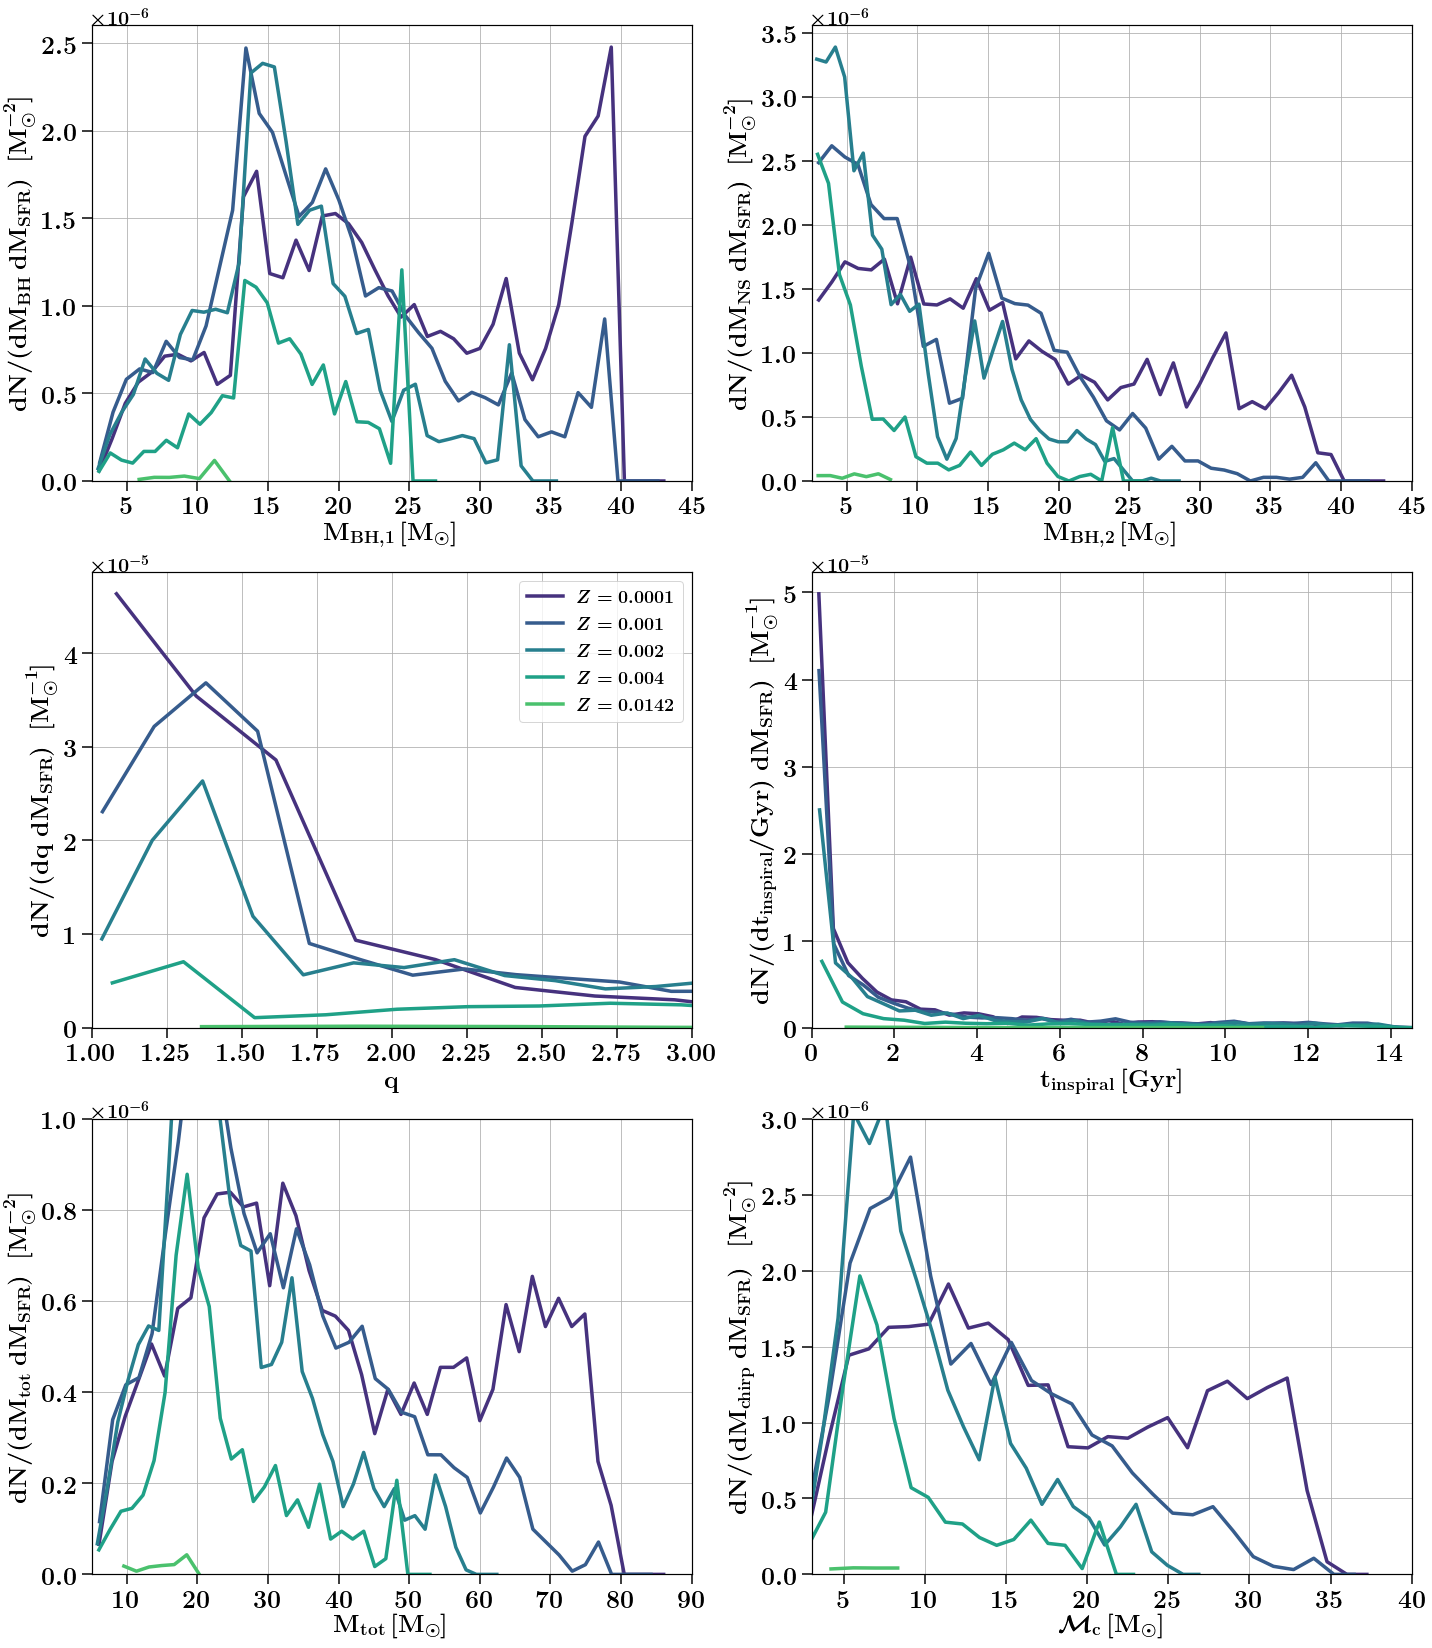

In [26]:
linewidth=3.5
ALPHA=0

indZ  = np.array([14,17,22,25]) #looked up earlier
indicesZ   = np.array([0, 4, 9, 14, 25])

mycolors = sns.cubehelix_palette(nColors, reverse=True)

N = nColors
cmap = plt.cm.plasma  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
mycolors = sns.color_palette("viridis", nColors+1)

f, ax= plt.subplots(ncols=2,nrows=3,figsize=(20,23), 
                  gridspec_kw={"width_ratios":[1.5, 1.5], "height_ratios":[2,2,2]})
ax[0,0]=plotBHmass(ax[0,0])
ax[0,1]=plotNSmass(ax[0,1])
ax[1,0]=plotq(ax[1,0]) 
ax[1,1]=plotTinspLin(ax[1,1])
ax[2,0]=plotMtot(ax[2,0])
ax[2,1]=plotMchirp(ax[2,1])

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig('./CombinedZdistributions_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()


# N per Z BHNS vs NSBH

In [ ]:
# def plotChannels(axes, fc, Data, dictRank, withinHubble=True):
#     cm       = plt.get_cmap('inferno')
#     nColors  = len(dictRank)+1
#     mycolors = colorlist #[cm(x) for x in np.linspace(0,1 , nColors)] 
#     solar = 0.0142
#     #We are going to sum and fill between channels 
#     lowerY = np.zeros(len(Data.metallicityGrid))
#     log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
#     for nrC, Channel in enumerate(dictRankBHNSList):
#         #Get the seeds that relate to sorted indices
#         seedsInterest = []
#         for index in dictRank[Channel]:
#             seedsInterest.extend(fc.sortedSeeds[index])
#         #Get metallicity systems this works because seeds in both
#         #files are in the same order
#         mask = np.in1d(Data.seeds, np.array(seedsInterest))
#         if withinHubble == True:
#             mask = mask & (Data.Hubble == True)
#         metallicities = Data.metallicitySystems[mask]
#         weights = Data.weight[mask] # //floor weights
#         #Now I have the metallicities of all systems in channel
#         #Bin them over metallicities and plot fill between
#         upperY = np.zeros(len(Data.metallicityGrid))
#         for nrZ, Z in enumerate(Data.metallicityGrid):
#             maskZ = metallicities == Z
#             upperY[nrZ] = np.sum(weights[maskZ]) # //floor weights
#         upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
#         axes.fill_between(log10ZZsun, lowerY*1e5, upperY*1e5, \
#                          facecolor=mycolors[nrC],\
#                           label=Channel, alpha=0.7)
#         lowerY = upperY
#     nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
#     nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
#     axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
#     axes.legend(loc=1, prop={'size':18})
#     #axes.set_yscale('log')
#     aBit =0.
#     axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
#     axes.set_ylim(bottom=0)

stroop
    
# dictRankBHNSList = ['BH-NS', 'NS-BH']    
# fig, axes = plt.subplots(1,1,figsize=(10,10))
# plotChannels(axes, fc, Data, dictChannelsNSorBHfirst , True)
# # plotChannels(axes[1], fc, Data, dictRankBHNS, True)

# plt.tight_layout()
# plt.savefig('./channelBHNSvsNSBH_BBH_.png')
# plt.show()
# plt.close()

In [ ]:
# fig, axes = plt.subplots(1,1, figsize=(9,8))

# #fill plot channels for BBH
# Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
#                  Mupper=150., binaryFraction=0.7)
# Data.setCOMPASDCOmask(types='BHNS', withinHubbleTime=True, optimistic=True)
# Data.setCOMPASData() 
# lowerY          = np.zeros(len(Data.metallicityGrid))
# log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
# # for nrC, seedsChannel in enumerate(ChannelSeeds):
# #     upperY = np.zeros(len(Data.metallicityGrid))
# #     for nrZ, Z in enumerate(Data.metallicityGrid):
# #         boolZ       = Data.metallicitySystems ==Z
# #         boolChannel = np.in1d(Data.seeds, seedsChannel)
# #         upperY[nrZ] = np.sum(boolZ & boolChannel)
# #     upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
# #     axes.fill_between(log10ZZsun, lowerY, upperY, facecolor=ChannelColours[nrC],
# #                       label=ChannelLabels[nrC], alpha=0.7)
# #     lowerY = upperY

# log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)

# cm       = plt.get_cmap('inferno')
# nColors  = 2+1
# mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# for nrT, mask in enumerate(['BHNS']):
    
#     Type = 'BHNS'
#     nrT = 1
    
#     Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=True)
#     Data.setCOMPASData()

    
    
#     yvalues   = np.zeros(len(Data.metallicityGrid))
#     yvaluesNSBH   = np.zeros(len(Data.metallicityGrid))
#     for nrZ, Z in enumerate(Data.metallicityGrid):
#         boolZ   = Data.metallicitySystems ==Z
#         weight     = Data.weight[boolZ]
#         M1         = Data.mass1[boolZ]
#         M2         = Data.mass2[boolZ]    
        
        
#         maskBHNS = getMaskBHNS(M1,M2)
        
#         maskNSBH = ~getMaskBHNS(M1,M2)
    
#         yvalues[nrZ] = np.sum(weight[maskBHNS])
#         yvaluesNSBH[nrZ] = np.sum(weight[maskBHNS]) + np.sum(weight[maskNSBH])
        
        
        
#     sqrtN = np.sqrt(yvaluesNSBH)
#     yvaluesBHNS = np.divide(yvalues, Data.totalMassEvolvedPerZ)
#     #per true Msun evolved per Z
#     yvaluesNSBH = np.divide(yvaluesNSBH, Data.totalMassEvolvedPerZ)
#     #Yerror  = np.divide(Yerror, Data.totalMassEvolvedPerZ)
#     Yerror = np.divide(yvaluesNSBH, sqrtN)
    
    
#     #plot the line
#     if Type == 'BHNS':
#         #fudge to brighten colour line compared to label
#         #axes.plot(log10ZZsun, -yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
# #         axes.errorbar(log10ZZsun, yvaluesBHNS, yerr=Yerror, ecolor='aqua',elinewidth=2.)
#         axes.plot(log10ZZsun, yvaluesBHNS, c=mycolors[1], alpha=1., lw=3., label=Type)
#         axes.plot(log10ZZsun, yvaluesNSBH, c='gold', alpha=1., lw=3., label='NSBH')
#         axes.fill_between(log10ZZsun, y1=np.zeros_like(yvaluesBHNS), y2=yvaluesBHNS, color=mycolors[1]) 
#         axes.fill_between(log10ZZsun, y1=yvaluesBHNS, y2=yvaluesNSBH, color='gold')
#     else:
#         axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
#         axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor=Colours[nrT],elinewidth=2.)
    
    

# nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
# nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
# axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
# axes.legend(loc=1, prop={'size':18})
# #axes.set_yscale('log')
# aBit =0.
# axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
# axes.set_ylim(bottom=0)
# axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# axes.yaxis.get_offset_text().set_fontsize(0.1)
# plt.tight_layout()
# plt.savefig('./nrPerZ_NSBHvsBHNS_BBH_.png', dpi=100, transparent=False)
# plt.show()
# plt.close()

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
indicesZ   = np.array([4,13,24]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
# width1     = np.diff(binsM1)
# width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    ZOfInterest = Data.metallicityGrid[indicesZ]
    print ZOfInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        ind        = np.where(Data.metallicityGrid == Z)[0]
        
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
#         print Mtot
        weight     = Data.weight[boolZ]
        neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
        print neff, 'neff'
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(Mtot)*0.95,max(Mtot)*1.1, int(2*(neff)**(1./3)))
        width = np.diff(binsM)

        
        y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$'%Z) #alphas[nrZ]
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm M_{tot} [M_{\odot}]$'
nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
# ax2.yaxis.get_offset_text().set_fontsize(14)
axe.set_xlim(2,35)
axe.set_ylim(0, .8e-6)
axe.legend(loc=0, prop={'size':18})
# ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./Mtot_pessimistic_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
# Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
#                  Mupper=150., binaryFraction=0.7)

# Types      = ['BHNS']
# #Colours    = ['k', 'r', 'b']
# Colours    = ['mediumaquamarine','mediumvioletred' ]



# alphas     = [1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([14,17,22,25]) # #np.array([14,17,22,25])
# minBin     = [0,  0,  2]
# maxBin     = [70, 30, 5]
# # nrBins     = [300,100,100]
# # binsM1      = np.linspace(0,80,100)
# # binsM2     = np.linspace(2,10,100)

# cm       = plt.get_cmap('viridis')
# nColors  = len(indicesZ)+1
# mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# # alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# # linestyles = ['-', '--', '-.', ':']
# # maxBin     = [70, 30, 5]
# # nrBins     = [300,100,100]
# # binsM1      = np.linspace(0,80,100)
# # binsM2     = np.linspace(2,10,100)
# # width1     = np.diff(binsM1)
# # width2     = np.diff(binsM2)


# #with some help of 
# #https://matplotlib.org/examples/pylab_examples/broken_axis.html

# fig, axe        = plt.subplots(figsize=(10,6))

# # ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
# axes = [axe] #, ax2]
# for nrT, Type in enumerate(Types):
#     Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=True)
#     Data.setCOMPASData()
#     #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# # #########COEN binning  ######
# #     if nrT != 2:
# #         binsM, width = binsM1, width1
# #     else:
# #         binsM, width = binsM2, width2
# ################
#     ZOfInterest = Data.metallicityGrid[indicesZ]
#     print ZOfInterest
#     for nrZ, Z in enumerate(ZOfInterest):
        
#         ind        = np.where(Data.metallicityGrid == Z)[0]
        
#         MsunEvolved= Data.totalMassEvolvedPerZ[ind]
#         boolZ      = Data.metallicitySystems == Z
#         M1         = Data.mass1[boolZ]
#         M2         = Data.mass2[boolZ]
#         Mtot       = M1 + M2
        
#         maskBHNSs = getMaskBHNS(M1,M2)
# #         
#         weight     = Data.weight[boolZ]
#         neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
# #         print neff, 'neff'
#         # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
#         binsM = np.linspace(min(Mtot)*0.95,max(Mtot)*1.1, int(3*(neff)**(1./3)))
#         width = np.diff(binsM)
# #         else:
# #             dim=1
# #             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
# #             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
# #             width = np.diff(binsM)    


        
#         y,       _ = np.histogram(Mtot[maskBHNSs], bins=binsM, weights= weight[maskBHNSs]) #// floor 
#         y          = np.divide(y, width) 
#         y          = y/MsunEvolved
        
#         y2,       _ = np.histogram(Mtot[~maskBHNSs], bins=binsM, weights= weight[~maskBHNSs]) #// floor 
#         y2          = np.divide(y2, width) 
#         y2          = y2/MsunEvolved
        
#         x          = (binsM[1:] + binsM[:-1])/2.
#         #y, x       = CV.stepifyMe(y, binsM, None, 0)
#         #only label once for the darkest colour
#         if nrT != 2 and nrZ == 0:
#             label = Type
#         elif nrT == 2 and nrZ ==0:
#             label = Type
#         else:
#             label = None
# #         if nrT != 2:
#         axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$ BH-NS'%Z) #alphas[nrZ]
#         axe.plot(x,y2, c=mycolors[nrZ], alpha=.5, lw=3, label=r'$Z = %s$ NS-BH'%Z) #alphas[nrZ]
# #         else:
# #             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
# nameX = r'$\rm M_{tot} [M_{\odot}]$'
# nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
# for nrA, ax in enumerate(axes):
#     if nrA ==0:
#         ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
#     else:
#         ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
#     ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# axe.yaxis.get_offset_text().set_fontsize(20)
# # ax2.yaxis.get_offset_text().set_fontsize(14)
# # ax2.set_xlim(2,5)
# axe.set_ylim(0, 1.4e-6)
# axe.legend(loc=0, prop={'size':18})
# # ax2.legend(loc=3, prop={'size':18})
# #ax1.get_yaxis().set_visible(False)
# plt.grid(True)
# plt.tight_layout()
# plt.subplots_adjust(wspace=0., hspace=0.5)
# plt.savefig('./Mtot_NSBH_BBH_.png', dpi=100, transparent=False)
# plt.show()
# plt.close()

# delay time 

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
# width1     = np.diff(binsM1)
# width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    ZOfInterest = Data.metallicityGrid[indicesZ]
    print ZOfInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        ind        = np.where(Data.metallicityGrid == Z)[0]
        
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        
        mask = boolZ & (Data.Hubble == True)
        log10tdelay= np.log10(Data.delayTimes[mask])
        print(len(log10tdelay), 'len')
        print( max(np.log10(Data.delayTimes[mask])), 'maxxx')
        weight     = Data.weight[boolZ]
        neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
        print neff, 'neff'
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(log10tdelay)*0.95,max(log10tdelay)*1.1, int(2*(neff)**(1./3)))
        width = np.diff(binsM)
#         else:
#             dim=1
#             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
#             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
#             width = np.diff(binsM)    

        print(np.mean(log10tdelay), '=mean')
        y, _   = np.histogram(log10tdelay, bins=binsM, weights= weight)
#         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$'%Z) #alphas[nrZ]
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm log_{10}(t_{delay}/Myr)$'
nameY = r'$\rm dN_{form} / (dlog_{10}(t_{delay}/Myr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=10)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(12)
# ax2.yaxis.get_offset_text().set_fontsize(14)
# ax2.set_xlim(2,5)
# axe.set_ylim(0, 1.4e-6)
# axe.set_xlim(0, 1.4e-6)
axe.legend(loc=0, prop={'size':18})
# ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./tdelay_pessimistic_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()

# coalescence time

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
# width1     = np.diff(binsM1)
# width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    ZOfInterest = Data.metallicityGrid[indicesZ]
    print ZOfInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        ind        = np.where(Data.metallicityGrid == Z)[0]
        
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        log10tc= np.log10(Data.tc[boolZ])
        
        print Mtot
        weight     = Data.weight[boolZ]
        neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
        print neff, 'neff'
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(log10tc)*0.95,max(log10tc)*1.1, int(2*(neff)**(1./3)))
        width = np.diff(binsM)
#         else:
#             dim=1
#             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
#             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
#             width = np.diff(binsM)    


        y, _   = np.histogram(log10tc, bins=binsM, weights= weight)
#         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$'%Z) #alphas[nrZ]
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm log_{10}(t_{\rm{insp}}/Myr)$'
nameY = r'$\rm dN_{\rm{insp}} / (dlog_{10}(t_{delay}/Myr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
# ax2.yaxis.get_offset_text().set_fontsize(14)
# ax2.set_xlim(2,5)
# axe.set_ylim(0, 1.4e-6)
# axe.set_xlim(0, 1.4e-6)
axe.legend(loc=0, prop={'size':18})
# ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./tc_pessimistic_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
# indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)

cm       = plt.get_cmap('viridis')
nColors  = len(indicesZ)+1
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
# width1     = np.diff(binsM1)
# width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    ZOfInterest = Data.metallicityGrid[indicesZ]
    print ZOfInterest
    for nrZ, Z in enumerate(ZOfInterest):
        
        ind        = np.where(Data.metallicityGrid == Z)[0]
        
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        log10tdelay= Data.q[boolZ]
        
        print Mtot
        weight     = Data.weight[boolZ]
        neff = (np.sum(weight))**2 / float(np.sum(weight**2.))
        print neff, 'neff'
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(log10tdelay)*0.95,max(log10tdelay)*1.1, int(4*(neff)**(1./3)))
        width = np.diff(binsM)
#         else:
#             dim=1
#             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
#             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
#             width = np.diff(binsM)    


        y, _   = np.histogram(log10tdelay, bins=binsM, weights= weight)
#         y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=mycolors[nrZ], alpha=1, lw=3, label=r'$Z = %s$'%Z) #alphas[nrZ]
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm q/Myr$'
nameY = r'$\rm dN_{form} / (dq)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
# ax2.yaxis.get_offset_text().set_fontsize(14)
# ax2.set_xlim(2,5)
# axe.set_ylim(0, 1.4e-6)
# axe.set_xlim(0, 1.4e-6)
axe.legend(loc=0, prop={'size':18})
# ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./massratio_pessimistic_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
## PLOT ALL 

In [ ]:
## fig, axes = plt.subplots(1,1, figsize=(12,6))

#fill plot channels for BBH
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)
Data.setCOMPASDCOmask(types='BBH', withinHubbleTime=False, optimistic=False)
Data.setCOMPASData() 
lowerY          = np.zeros(len(Data.metallicityGrid))
log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)

upperY = np.zeros(len(Data.metallicityGrid))
for nrZ, Z in enumerate(Data.metallicityGrid):
    boolZ       = Data.metallicitySystems ==Z
    
#     boolChannel = np.in1d(Data.seeds, seedsChannel)
    upperY[nrZ] = np.sum(boolZ)
upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
# axes.fill_between(log10ZZsun, lowerY, upperY, facecolor=ChannelColours[nrC],
#                   label=ChannelLabels[nrC], alpha=0.7)
lowerY = upperY


fig, axes        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
# axes = [axe] #, ax2]


log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    weight     = Data.weight
    yvalues   = np.zeros(len(Data.metallicityGrid))
    for nrZ, Z in enumerate(Data.metallicityGrid):
        boolZ   = Data.metallicitySystems ==Z
        yvalues[nrZ] = np.sum(weight[boolZ])  #np.sum(boolZ)
        
        if Z==0.0142:
            print(yvalues[nrZ])
    sqrtN = np.sqrt(yvalues)
    
    #per true Msun evolved per Z
    yvalues = np.divide(yvalues, Data.totalMassEvolvedPerZ)
    #Yerror  = np.divide(Yerror, Data.totalMassEvolvedPerZ)
    Yerror = np.divide(yvalues, sqrtN)
    
    
    if Type=='BNS':
        print(yvalues)
        yvalues = yvalues * (1.4)**2.2
    elif Type =='BHNS':
        yvalues = yvalues * (8)**2.2
    elif Type =='BBH':
        yvalues = yvalues * (14)**2.2    
        
    #plot the line
    if Type == 'BHNS':
        #fudge to brighten colour line compared to label
        #axes.plot(log10ZZsun, -yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
        axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor='aqua',elinewidth=2., c=Colours[nrT])
        axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=5., label=Type)
    else:
        axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor=Colours[nrT],elinewidth=2.,c=Colours[nrT])
        axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=5., label=Type)
        #axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor=Colours[nrT],elinewidth=2.)
    
    

nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
nameY = r'$\rm dN_{obs} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.legend(loc=3, prop={'size':18})
axes.set_yscale('log')
aBit =0.
axes.grid(True)
# axes.set_xlim(min(log10ZZsun)-aBit+2, max(log10ZZsun)+aBit)

# axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes.yaxis.get_offset_text().set_fontsize(0.1)
# axes.set_ylim(0,.5)
plt.tight_layout()
plt.savefig('./nrPerZall_inHubbleObs_BBH_.png', dpi=300, transparent=False)
plt.show()
plt.close()

# # #

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BHNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['mediumaquamarine','mediumvioletred' ]



alphas     = [1. ,0.65, 0.4, 0.25]
indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
nrBins     = [300,100,100]
binsM1      = np.linspace(0,80,100)
binsM2     = np.linspace(2,10,100)

# alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
# linestyles = ['-', '--', '-.', ':']
# maxBin     = [70, 30, 5]
# nrBins     = [300,100,100]
# binsM1      = np.linspace(0,80,100)
# binsM2     = np.linspace(2,10,100)
width1     = np.diff(binsM1)
width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(10,6))

# ax2 = plt.axes([.52, .55, .4, .37]) #plt.axes([.52, .55, .4, .37])
axes = [axe] #, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=True)
    Data.setCOMPASData()
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    

# #########COEN binning  ######
#     if nrT != 2:
#         binsM, width = binsM1, width1
#     else:
#         binsM, width = binsM2, width2
################
    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        
        
        weight     = Data.weight[boolZ]
        print len(Mtot)
        print len(Mtot)**(-1./5)
        # adaptive binning following scotts rule  https://www.fmrib.ox.ac.uk/datasets/techrep/tr00mj2/tr00mj2/node24.html
        binsM = np.linspace(min(Mtot)*0.95,max(Mtot)*1.1, int(4*(neff)**(1./3)))
        width = np.diff(binsM)
#         else:
#             dim=1
#             NbinsScott = int(1./ ((len(neff))**(-1./(dim+4))))
#             binsM = np.linspace(min(Mtot),max(Mtot), NbinsScott)
#             width = np.diff(binsM)    


        
        y,       _ = np.histogram(Mtot, bins=binsM, weights= weight) #// floor 
        y          = np.divide(y, width) 
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
#         if nrT != 2:
        axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=3, label=r'$Z = %s$'%Z)
#         else:
#             ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=r'$Z = %s$'%Z)
    
nameX = r'$\rm M_{tot} [M_{\odot}]$'
nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
ax2.yaxis.get_offset_text().set_fontsize(14)
# ax2.set_xlim(2,5)
axe.set_ylim(0, 1.5e-6)
axe.legend(loc=0, prop={'size':18})
ax2.legend(loc=3, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./Mtot_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BBH', 'BHNS', 'BNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]

alphas     = [1. ,0.65, 0.4, 0.25]
indicesZ   = np.array([3,4,5,6]) # #np.array([14,17,22,25])
minBin     = [0,  0,  2]
maxBin     = [70, 30, 5]
nrBins     = [300,100,100]
binsM1      = np.linspace(0,80,150)
binsM2     = np.linspace(2,10,100)
width1     = np.diff(binsM1)
width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig        = plt.subplots(figsize=(9,8))
ax0 = plt.subplot2grid((6,4),(0,0), colspan=4, rowspan=1)
ax1 = plt.subplot2grid((6,4),(1,0), colspan=4, rowspan=5)

ax2 = plt.axes([.52, .55, .4, .37])
axes = [ax0, ax1, ax2]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    ZOfInterest = Data.metallicityGrid[indZ]
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    if nrT != 2:
        binsM, width = binsM1, width1
    else:
        binsM, width = binsM2, width2
    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        weight     = Data.weight[boolZ]
        print weight
        print len(M2), np.sqrt(len(M2))
        Mtot       = M1 + M2
        print len(Mtot), Type, 'metallicity = ', Z
# #Floor
#         if nrT != 2:
#             binsM = np.linspace(min(Mtot)-2,max(Mtot)+3, int(np.sqrt(len(Mtot))))
#             width = np.diff(binsM)
#         else:
#             binsM = np.linspace(min(Mtot)-.5,max(Mtot)+.5, int(np.sqrt(len(Mtot))))
#             width = np.diff(binsM)
# COEN:

        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
        if nrT != 2:
            axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label, weights=weight)
        else:
            ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label, weights = weight)
            
            
        if nrT != 2:
            binsM, width = binsM1, width1
        else:
            binsM, width = binsM2, width2
        y,       _ = np.histogram(Mtot, bins=binsM, weights= weight)
        y          = np.divide(y, width)
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        
        ###################
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
        elif nrT == 2 and nrZ ==0:
            label = Type
        else:
            label = None
        if nrT != 2:
            axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
        else:
            ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
    
nameX = r'$\rm M_{tot} [M_{\odot}]$'
nameY = r'$\rm dN / (dM_{tot}\ dM_{SFR}) \ \ [M_{\odot}^{-2}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(20)
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.set_xlim(2,5)
axe.set_ylim(0, 1.6e-6)
axe.legend(loc=2, prop={'size':18})
ax2.legend(loc=1, prop={'size':18})
#ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./Mtot_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)

Types      = ['BBH', 'BHNS', 'BNS']
#Colours    = ['k', 'r', 'b']
Colours    = ['midnightblue','mediumaquamarine','mediumvioletred' ]
indZ = np.array([3,4,5,6]) # change this when more grid points
alphas     = [1. ,0.8, 0.65, 0.5]#[::-1]
linestyles = ['-', '--', '-.', ':']
maxBin     = [70, 30, 5]
nrBins     = [300,100,100]
binsM1      = np.linspace(0,80,100)
binsM2     = np.linspace(2,10,100)
width1     = np.diff(binsM1)
width2     = np.diff(binsM2)


#with some help of 
#https://matplotlib.org/examples/pylab_examples/broken_axis.html

fig, axe        = plt.subplots(figsize=(9,8))

ax2 = plt.axes([.52, .55, .4, .37])
axes = [axe, ax2]

handles1 = []
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    ZOfInterest = Data.metallicityGrid[indZ]
    #binsM          = np.linspace(minBin[nrT],maxBin[nrT], nrBins[nrT])
    if nrT != 2:
        binsM, width = binsM1, width1
    else:
        binsM, width = binsM2, width2
    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        boolZ      = Data.metallicitySystems == Z
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]
        Mtot       = M1 + M2
        y,       _ = np.histogram(Mtot, bins=binsM)
        y          = np.divide(y, width)
        y          = y/MsunEvolved
        x          = (binsM[1:] + binsM[:-1])/2.
        #y, x       = CV.stepifyMe(y, binsM, None, 0)
        #only label once for the darkest colour
        if nrT != 2 and nrZ == 0:
            label = Type
            ll    = True
        elif nrT == 2 and nrZ ==0:
            label = Type
            ll    = True
        else:
            label = None
            ll = False
        if nrT != 2:
            if ll:
                handle, = axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
                handles1.extend([handle])
            else:
                axe.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
        else:
            ax2.plot(x,y, c=Colours[nrT], alpha=alphas[nrZ], lw=2.5, label=label)
    
nameX = r'$\rm M_{tot} [M_{\odot}]$'
nameY = r'$\rm dN_{form} / (dM_{tot}\ dM_{SFR}) \ \ [10^{-6}\ M_{\odot}^{-2}]$'
for nrA, ax in enumerate(axes):
    if nrA ==0:
        ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY)
    else:
        ax = CV.layoutAxes(ax, nameX='', nameY='', fontsize=14)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axe.yaxis.get_offset_text().set_fontsize(0.1)
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.set_xlim(2,5)
axe.set_ylim(0, 1.6e-6)
first_legend = axe.legend(handles=handles1, prop={'size':18}, bbox_to_anchor=(1.0, .4))
axe.add_artist(first_legend)
ax2.legend(loc=1, prop={'size':18})


##FUDGE FOR ADDITIONAL LEGEND
#https://stackoverflow.com/questions/12761806/matplotlib-2-different-legends-on-same-graph
#https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
#draw fake lines outside plot
handles2 = []
labelsZ = [r'$\rm Z_{\odot}/10$',r'$\rm Z_{\odot}/5$',r'$\rm Z_{\odot}/2$',r'$\rm Z_{\odot}$']
for nra, alpha in enumerate(alphas):
    #draw a line outside plot area
    line, = axe.plot([1, 2],[-1, -2], c='grey', alpha=alphas[nra], lw=2.5, label=labelsZ[nra])
    handles2.extend([line])

second_legend = axe.legend(handles=handles2, loc=4,  prop={'size':17})   
axe.add_artist(second_legend)
axe.set_xlim(right=85)



#ax1.get_yaxis().set_visible(False)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.5)
plt.savefig('./Mtot_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()

In [ ]:
binsT      = np.linspace(0.5,4.5,100)
width      = np.diff(binsT)
x          = (binsT[1:]+binsT[:-1])/2.

fig        = plt.subplots(1,1,figsize=(9,8))
ax0        = plt.subplot2grid((3,3),(0,0), colspan=3, rowspan=1)
ax1        = plt.subplot2grid((3,3),(1,0), colspan=3, rowspan=1)
ax2        = plt.subplot2grid((3,3),(2,0), colspan=3, rowspan=1)
axes = [ax0, ax1, ax2]
handles1 = [[],[],[]]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    ZOfInterest = Data.metallicityGrid[indZ]
    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        maskZ      = Data.metallicitySystems == Z
        log10tdelay= np.log10(Data.delayTimes[maskZ])
        print(max(log10tdelay), 'maxxx')
        y, bins    = np.histogram(log10tdelay, bins=binsT)
        y          = np.divide(y, width)
        y          = y / MsunEvolved
        if nrZ == 0:
            label = Type
            ll    = True
        else:
            label=None
            ll   = False
        if ll:
            handle, =axes[nrT].plot(x, y, c=Colours[nrT], alpha=alphas[nrZ], label=label, lw=2.)
            handles1[nrT].extend([handle])
        else:
            axes[nrT].plot(x, y, c=Colours[nrT], alpha=alphas[nrZ], label=label, lw=2.)
ax1.get_xaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)


handles2 = []
labelsZ = [r'$\rm Z_{\odot}/10$',r'$\rm Z_{\odot}/5$',r'$\rm Z_{\odot}/2$',r'$\rm Z_{\odot}$']
for nra, alpha in enumerate(alphas):
    #draw a line outside plot area
    line, = ax1.plot([1, 2],[-1, -2], c='grey', alpha=alphas[nra], lw=2.5, label=labelsZ[nra])
    handles2.extend([line])

second_legend = ax1.legend(handles=handles2, loc=3,  prop={'size':17.5}, ncol=1)   
ax1.add_artist(second_legend)
#axe.set_xlim(right=85)


nameX = r'$\rm log_{10}(t_{delay}/Myr)$'
nameY = r'$\rm dN_{form} / (dlog_{10}(t_{delay}/Myr)\ dM_{SFR})\ \ [M_{\odot}^{-1}]$'
#ticklocator = [2500,500,1000]
for nra, ax in enumerate(axes):
    
    if nra == 1:
        nameY2 = nameY
    else:
        nameY2= ''
    ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY2)
    first_legend = ax.legend(handles=handles1[nra], loc=2, prop={'size':18})
    ax.add_artist(first_legend)
    ax.set_yscale('log')
#     ax.set_ylim(10**(-7), 10**(-4.5))
    yticks = ax.get_yticks()

    print yticks[1:-3]
#     ax.set_yticks(yticks[2:-2])
#     ax.set_xlim(left=0.0, right=4.3)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.0)

plt.savefig('./tDelay_BBH_.png')
plt.show()
plt.close()

In [ ]:
binsT      = np.zeros(101)
binsT1      = list(np.linspace(0,1.0000001,100))
binsT[0:-1]=binsT1
binsT[-1]  = binsT[-2]+0.000000001
width      = np.diff(binsT)
x          = (binsT[1:]+binsT[:-1])/2.

fig        = plt.subplots(1,1,figsize=(9,8))
ax0        = plt.subplot2grid((3,3),(0,0), colspan=3, rowspan=1)
ax1        = plt.subplot2grid((3,3),(1,0), colspan=3, rowspan=1)
ax2        = plt.subplot2grid((3,3),(2,0), colspan=3, rowspan=1)
axes = [ax0, ax1, ax2]
handles1 = [[],[],[]]
for nrT, Type in enumerate(Types):
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()
    ZOfInterest = Data.metallicityGrid[indZ]

    for nrZ, Z in enumerate(ZOfInterest):
        ind        = np.where(Data.metallicityGrid == Z)[0]
        MsunEvolved= Data.totalMassEvolvedPerZ[ind]
        maskZ      = Data.metallicitySystems == Z
        q          = Data.q[maskZ]
        y, bins    = np.histogram(q, bins=binsT)
        y          = np.divide(y, width)
        y          = y / MsunEvolved
        if nrZ == 0:
            label = Type
            ll    = True
        else:
            label=None
            ll   = False
        if ll:
            handle, =axes[nrT].plot(x, y, c=Colours[nrT], alpha=alphas[nrZ], label=label, lw=2.)
            handles1[nrT].extend([handle])
        else:
            axes[nrT].plot(x, y, c=Colours[nrT], alpha=alphas[nrZ], label=label, lw=2.)
ax1.get_xaxis().set_visible(False)
ax0.get_xaxis().set_visible(False)
handles2 = []
labelsZ = [r'$\rm Z_{\odot}/10$',r'$\rm Z_{\odot}/5$',r'$\rm Z_{\odot}/2$',r'$\rm Z_{\odot}$']
for nra, alpha in enumerate(alphas):
    #draw a line outside plot area
    line, = ax1.plot([-11, -22],[1e-5, 2e-5], c='grey', alpha=alphas[nra], lw=2.5, label=labelsZ[nra])
    handles2.extend([line])
ax1.set_xlim(ax0.get_xlim())
second_legend = ax1.legend(handles=handles2, loc=4,  prop={'size':17.5}, ncol=1)   
ax1.add_artist(second_legend)
nameX = r'$\rm q_{\ (light/heavy)}$'
nameY = r'$\rm dN_{form} / (dq\  dM_{SFR}) \ \ [M_{\odot}^{-1}]$'
for nra, ax in enumerate(axes):
    
    if nra == 1:
        nameY2 = nameY
        ax.set_ylabel(nameY, labelpad=30)
    else:
        nameY2= ''
    ax = CV.layoutAxes(ax, nameX=nameX, nameY=nameY2)
    first_legend = ax.legend(handles=handles1[nra], loc=1, prop={'size':18})
    ax.add_artist(first_legend)
    yticks = ax.get_yticks()
    ax.set_yticks(yticks[1:])
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.ticklabel_format(style='sci', axis='y', scilimits=(1,1))
    ax.set_xlim(0,1.1)
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.0)
plt.savefig('./massRatio_BBH_.png')
plt.show()
plt.close()

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(9,8))

#fill plot channels for BBH
Data            = CC.COMPASData(path=pathCOMPASOutput, lazyData=True, Mlower=5., \
                 Mupper=150., binaryFraction=0.7)
Data.setCOMPASDCOmask(types='BBH', withinHubbleTime=True, optimistic=False)
Data.setCOMPASData() 
lowerY          = np.zeros(len(Data.metallicityGrid))
log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)
# for nrC, seedsChannel in enumerate(ChannelSeeds):
#     upperY = np.zeros(len(Data.metallicityGrid))
#     for nrZ, Z in enumerate(Data.metallicityGrid):
#         boolZ       = Data.metallicitySystems ==Z
#         boolChannel = np.in1d(Data.seeds, seedsChannel)
#         upperY[nrZ] = np.sum(boolZ & boolChannel)
#     upperY = np.divide(upperY, Data.totalMassEvolvedPerZ) + lowerY
#     axes.fill_between(log10ZZsun, lowerY, upperY, facecolor=ChannelColours[nrC],
#                       label=ChannelLabels[nrC], alpha=0.7)
#     lowerY = upperY

log10ZZsun = np.round(np.log10(Data.metallicityGrid/solar),2)


for nrT, mask in enumerate(['BHNS']):
    
    Type = 'BHNS'
    nrT = 1
    
    Data.setCOMPASDCOmask(types=Type, withinHubbleTime=True, optimistic=False)
    Data.setCOMPASData()

    
    
    yvalues   = np.zeros(len(Data.metallicityGrid))
    yvaluesNSBH   = np.zeros(len(Data.metallicityGrid))
    for nrZ, Z in enumerate(Data.metallicityGrid):
        boolZ   = Data.metallicitySystems ==Z
        weight     = Data.weight[boolZ]
        M1         = Data.mass1[boolZ]
        M2         = Data.mass2[boolZ]    
        
        
        maskBHNS = getMaskBHNS(M1,M2)
        
        maskNSBH = ~getMaskBHNS(M1,M2)
    
        yvalues[nrZ] = np.sum(weight[maskBHNS])
        yvaluesNSBH[nrZ] = np.sum(weight[maskBHNS]) + np.sum(weight[maskNSBH])
        
        
        
    sqrtN = np.sqrt(yvaluesNSBH)
    
    #per true Msun evolved per Z
    yvalues = np.divide(yvaluesNSBH, Data.totalMassEvolvedPerZ)
    #Yerror  = np.divide(Yerror, Data.totalMassEvolvedPerZ)
    Yerror = np.divide(yvalues, sqrtN)
    
    
    #plot the line
    if Type == 'BHNS':
        #fudge to brighten colour line compared to label
        #axes.plot(log10ZZsun, -yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
        axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor='aqua',elinewidth=2.)
        axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
    else:
        axes.plot(log10ZZsun, yvalues, c=Colours[nrT], alpha=1., lw=3., label=Type)
        axes.errorbar(log10ZZsun, yvalues, yerr=Yerror, ecolor=Colours[nrT],elinewidth=2.)
    
    

nameX = r'$\rm log_{10}(Z/Z_{\odot})$'
nameY = r'$\rm dN_{form} / dM_{SFR}  \ \  [10^{-5}\ M_{\odot}^{-1}]\  $'
axes = CV.layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.legend(loc=1, prop={'size':18})
#axes.set_yscale('log')
aBit =0.
axes.set_xlim(min(log10ZZsun)-aBit, max(log10ZZsun)+aBit)
axes.set_ylim(bottom=0)
axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
axes.yaxis.get_offset_text().set_fontsize(0.1)
plt.tight_layout()
plt.savefig('./nrPerZ_BBH_.png', dpi=100, transparent=False)
plt.show()
plt.close()